# Reading Rigol Stored Waveforms

**Scott Prahl**

**Jan 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as rigol
except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")

## Introduction

The idea is to create a robust, fast parser for waveform `.wfm` files created by Rigol oscilloscopes. Specifically,

```python
    import matplotlib.pyplot as plt
    import RigolWFM.wfm as rigol

    model = "DS1102E'
    filename = "name.wfm"
    waveforms = rigol.Wfm.from_file(filename, model)
    description = waveforms.describe()
    print(description)
    
    url = "https://somewebsite.com/path/file.wfm"
    waveforms = rigol.Wfm.from_url(url, model)
    for ch in waveforms.channels:
        plt.plot(ch.times, ch.volts, label=ch.name)
    plt.legend()
    plt.show()
```

## Motivation

The `.wfm` format offers a few nice advantages

* saving onto a USB drive on the scope is fast
* uploading the `.wfm` file back to the scope is possible
* no need to interface to a computer
* the files are small (one byte per point)
* all the settings are contained in the file header

The disadvantage are that different scopes (and often different firmware version) have different formats.  Worse, documentation from Rigol on these formats is sparse at best.  Finally, the Rigol software to support reading these files is klunky.

## The `Wfm` class

This is a class that has a just a few methods to create objects from files and urls:

* Wfm.from_file(filename, scope_kind)
* Wfm.from_url(url, scope_kind)

It also has a few methods to manipulate the data.

* Wfm.describe()
* Wfm.csv()
* Wfm.plot()

The first two return strings.  The third produces a basic `matplotlib.pyplot.plt` object.

## Example of single trace waveform from local file

First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled.

In [3]:
# raw=true is needed because this is a binary file
wfm_url = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-D.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, kind='DS1102E')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-D.wfm?raw=true'
Channel 1
    General:
         Scope = 1000E
      Firmware = unknown
       Enabled = True
    Voltage:
        Scale  = 2 V/div
        Offset = 2.4 V
      Coupling = unknown
    Time:
        Scale  = 100 µs/div
        Delay  = 0 s
        Delta  = 400 ns/point
    Data:
        Points = 8188
        Raw    = [       41,       41,       41  ...       110,      110]
        Volts  = [   4.48 V,   4.48 V,   4.48 V  ...   -1.04 V,  -1.04 V]
        Times  = [-1.6376 ms,-1.6372 ms,-1.6368 ms  ... 1.6372 ms,1.6376 ms]
Channel 2
    General:
         Scope = 1000E
      Firmware = unknown
       Enabled = True
    Voltage:
        Scale  = 5 V/div
        Offset = -15.8 V
      Coupling = unknown
    Time:
        Scale  = 100 µs/div
        Delay  = 0 s
        Delta  = 400 ns/point
    Data:
        Points = 8188
        Raw    = [      204,      204,      204  ...       178,      178]
        

### Sample Plot

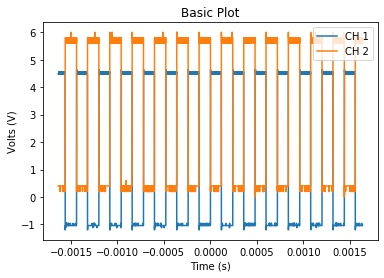

In [6]:
w.plot()
plt.title('Basic Plot')
plt.show()

### Sample `.csv` file

In [8]:
s = w.csv()

# just show the first few entries
rows = s.split('\n')
for i in range(5):
    print(rows[i])


0,4.480000e+00,4.000000e-01
1,4.480000e+00,4.000000e-01
2,4.480000e+00,4.000000e-01
3,4.480000e+00,4.000000e-01
4,4.480000e+00,4.000000e-01
